In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
# Приведем матрицы в понятный вид строки наблюжения, столюцы признаки
X_st=X.T
y_st=y.reshape(-1,1)

In [4]:
# Функция стандартизации
def calc_std_feat(x):
    res = (x - x.mean(axis = 0)) / x.std(axis = 0)
    return res

In [5]:
# стандартизируем данные
X_st[:,1:]= calc_std_feat(X_st[:,1:])

In [6]:
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

Задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [7]:
def calc_logloss(y, y_pred):
    y_pred[y_pred==1]=1-1e-16
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

В данной функции под логофорифмом, ноль может оказаться лишь в том случае, если y_pred = 0 или 1 . Что невозможно, поскольку y_pred = sigmoid. А выражение 1 / (1 + np.exp(-z)) никогда не принимает 0 или еденицу. Но есть ограничения по количеству знаков после запятой. Если боле 16 девяток, то будет единица. Поэтому отработаем для единицы

В данной функции под логофорифмом, ноль может оказаться лишь в том случае, если y_pred = 0 или 1 . Что невозможно, поскольку
y_pred = sigmoid. А выражение 1 / (1 + np.exp(-z)) никогда не принимает 0 или еденицу. Таким образом изменений не требуется

In [8]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

Задание 2: Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [9]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1]).reshape(-1,1)
    n = X.shape[0]
    for i in range(1, iterations+1):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot(X.T,(y_pred - y)))
    return W,err

In [10]:
iterations=[10,100,1000,10000,100000,1000000]
alpha = [1,0.1,0.01,0.001,0.0001,0.00001]
analys = pd.DataFrame({'alpha':alpha})

In [11]:
for i in iterations:
    data = []
    for j in alpha:
        data.append(eval_model(X_st,y_st,i,alpha=j)[1])
    analys[f'iter_{i}'] = data    

In [12]:
analys

,alpha,iter_10,iter_100,iter_1000,iter_10000,iter_100000,iter_1000000
0,1.00000,0.466800,0.310266,0.179127,0.077703,0.018903,0.001993
1,0.10000,0.659849,0.461771,0.310088,0.179137,0.077706,0.018903
2,0.01000,0.752023,0.651970,0.461290,0.310070,0.179138,0.077706
3,0.00100,0.762652,0.750868,0.651204,0.461242,0.310068,0.179138
4,0.00010,0.763729,0.762532,0.750753,0.651127,0.461238,0.310068
5,0.00001,0.763837,0.763717,0.762521,0.750741,0.651120,0.461237


Тенденция такая, что чем больше альфа и чем больше число итераций, тем меньше ошибка

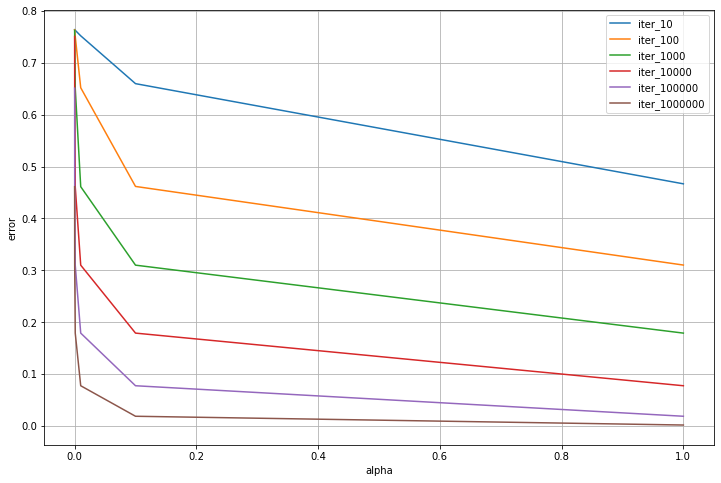

In [13]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.xlabel('alpha')
plt.ylabel('error')
for i in analys.columns[1:]:
    plt.plot(analys['alpha'],analys[i], label =i)
plt.legend()    

Задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [14]:
def calc_pred_proba(x,W):
    return sigmoid(x@W)

In [15]:
w,err = eval_model (X_st,y_st,1000000,alpha=1)

print(err)
print(w)

0.001992505334331929
[[ 34.94386912]
 [-57.21098075]
 [-90.18866237]
 [179.1999906 ]]


In [16]:
calc_pred_proba(X_st,w)

array([[9.70163473e-03],
       [6.85032391e-19],
       [1.00000000e+00],
       [8.19209504e-11],
       [9.99294298e-01],
       [4.28298199e-18],
       [1.00000000e+00],
       [1.79113178e-04],
       [9.90752077e-01],
       [1.00000000e+00]])

Задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [17]:
def calc_pred(x,w):
    res = calc_pred_proba(x,w)
    res[res>=0.5]=1
    res[res!=1]=0
    return res

In [18]:
y_pred = calc_pred(X_st,w)
y_pred==y_st

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [19]:
def accuracy(y,y_pred):
    return (y_pred==y).sum()/len(y)
    

In [20]:
accuracy(y_st,y_pred)

1.0

In [33]:
def matrix_error(y,y_pred):
    res = pd.DataFrame({'predict':['positiv','negativ']})
    t = y_pred[y==1]
    tp = t[t==1]
    fn = t[t!=1]
    res['positiv'] = [len(tp),len(fn)]
    n = y_pred[y!=1]
    fp=n[n==1]
    tn=n[n!=1]                    
    res['negativ'] = [len(fp),len(tn)]
    return res
    

In [22]:
me = matrix_error(y_st,y_pred)
me

,predict,positiv,negativ
0,positiv,5,0
1,negativ,0,5


In [23]:
# Точность
precision = me.iloc[0,1]/(me.iloc[0,1]+me.iloc[0,2])
precision

1.0

In [24]:
# полнота
recall = me.iloc[0,1]/me['positiv'].sum()
recall

1.0

In [25]:
# посчитаем f1
f1 = 2*precision*recall/(precision+recall)
f1

1.0

Задание 6: Могла ли модель переобучиться? Почему?

In [26]:
w

array([[ 34.94386912],
       [-57.21098075],
       [-90.18866237],
       [179.1999906 ]])

Коэфициенты большие, возможно и было переобучение. Навреное мало данных

Задание 7 (опциональное): Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [27]:
def eval_model_l1(X, y, iterations=100000, alpha=0.1,k=0.001):
    np.random.seed(42)
    W = np.random.randn(X.shape[1]).reshape(-1,1)
    n = X.shape[0]
    for i in range(1, iterations+1):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W_delta = np.sign(w)*k
        W -= alpha * (1/n * np.dot(X.T,(y_pred - y)))+2*W_delta
    return W,err

In [28]:
W_l1,err_l1 = eval_model_l1(X_st,y_st,iterations=1000000, alpha=1)
W_l1,err_l1

(array([[  4.8137121 ],
        [ -9.95434358],
        [-10.14686056],
        [ 23.55199203]]),
 0.11404268698941919)

In [29]:
y_pred_l1 = calc_pred(X_st,W_l1)
y_pred_l1==y_st

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [30]:
def eval_model_l2(X, y, iterations=100000, alpha=0.1,k=0.0001):
    np.random.seed(42)
    W = np.random.randn(X.shape[1]).reshape(-1,1)
    n = X.shape[0]
    for i in range(1, iterations+1):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W_delta = np.sign(w)*k
        W -= alpha * (1/n * np.dot(X.T,(y_pred - y)))+2*k*W
    return W,err

In [31]:
W_l2,err_l2 = eval_model_l2(X_st,y_st,iterations=1000000, alpha=1)
W_l2,err_l2

(array([[ 3.97691161],
        [-8.51191312],
        [-8.33060819],
        [19.68509262]]),
 0.13250068346458468)

In [32]:
y_pred_l2 = calc_pred(X_st,W_l2)
y_pred_l2 == y_st

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])